#### Problem 2.1

To walk “downhill” on the loss function (equation 2.5), we measure its gradient with  
respect to the parameters ϕ0 and ϕ1. Calculate expressions for the slopes ∂L/∂ϕ0 and ∂L/∂ϕ1.

$\begin{aligned} & L[\phi]=\sum_{i=1}^I\left(f(x, \phi)-y_i\right)^2=\sum_{i=1}^I\left(\phi_0+x_i \phi_1-y_i\right)^2 \\ & \frac{\delta L}{\delta \phi_0}=2 \cdot\sum_{i=1}^I \left(\phi_0+x_i \phi_1-y_i\right) \\ & \frac{d L}{d \phi_1}=2 \cdot \sum_{i=1}^I\left(\phi_0+x_i \phi_1-y_i\right) \cdot x_i\end{aligned}$

#### Problem 2.2

Show that we can find the minimum of the loss function in closed form by setting  
the expression for the derivatives from problem 2.1 to zero and solving for ϕ0 and ϕ1. Note that  
this works for linear regression but not for more complex models; this is why we use iterative  
model fitting methods like gradient descent (figure 2.4).

There are two ways of solving this problem:

1) Mathematically manipulate it into a 2x2 matrix and solve it using Cramer’s rule.
2) Direct approach

##### 1) Mathematically manipulate it into a 2x2 matrix and solve it using Cramer’s rule.

$
\begin{aligned}
    2 \cdot &\sum_{i=1}^{I} (\phi_0 + \phi_1 \cdot x_i - y_i) = 0\\
    &\Leftrightarrow \sum_{i=1}^{I} \phi_0 + \sum_{i=1}^{I} \phi_1 \cdot x_i - y_i = 0 \\
    &\Leftrightarrow \phi_0 \cdot I + \phi_1 \cdot \sum_{i=1}^{I} x_i = \sum_{i=1}^{I} y_i \\
    2 \cdot &\sum_{i=1}^{I} (\phi_0 + \phi_1 \cdot x_i - y_i) \cdot x_i = 0 \\
    &\Leftrightarrow \phi_0 \cdot \sum_{i=1}^{I} x_i + \langle x \mid x \rangle \phi_1 = \langle x \mid y \rangle
\end{aligned}
$

$
\begin{aligned}
    \Rightarrow \begin{pmatrix}
        I & \sum_{i=1}^{I} x_i \\
        \sum_{i=1}^{I} x_i & \langle x \mid x \rangle
    \end{pmatrix}
    \begin{pmatrix}
        \phi_0 \\
        \phi_1
    \end{pmatrix}
    =
    \begin{pmatrix}
        \sum_{i=1}^{I} y_i \\
        \langle x \mid y \rangle
    \end{pmatrix}
\end{aligned}
$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_fitted_2d_graph(x: np.array, y: np.array, phi_0: float, phi_1: float):
    plt.scatter(x, y, color='blue', label='Data points')
    
    x_line = np.linspace(np.min(x), np.max(x), 100)
    y_line = phi_0 + phi_1 * x_line
    plt.plot(x_line, y_line, color='red', label='Fitted line')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot with Fitted Line')
    plt.legend()
    plt.show()

In [2]:
def lr_2d_matrix(x: np.array, y: np.array) -> tuple[float, float]:
    a = len(x)
    b = np.sum(x)
    c = b
    d = np.dot(x, x)
    e = np.sum(y)
    f = np.dot(x, y)
    return solve_cramer(a, b, c, d, e, f)

def solve_cramer(a: int, b: int, c: int, d: int, e: int, f: int) -> tuple[float, float]:
    det = calc_2d_det(a, b, c, d)
    if det == 0:
        raise ValueError("The problem has no solution.")
    det_x = calc_2d_det(e, b, f, d)
    det_y = calc_2d_det(a, e, b, f)
    x = det_x / det
    y = det_y / det
    return (x, y)
    

def calc_2d_det(a: float, b: float, c: float, d: float) -> float:
    return a*d - b*c

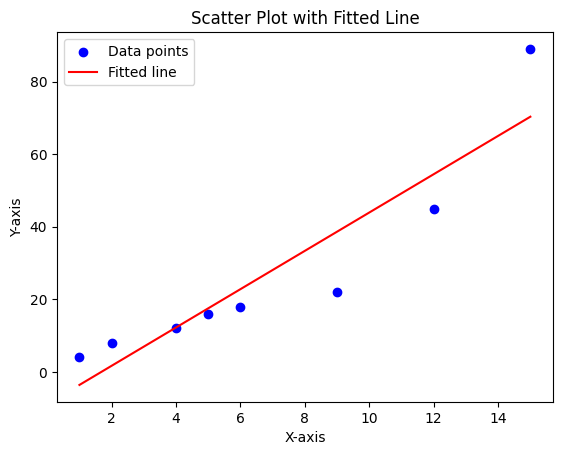

In [3]:
x = np.array([1, 2, 4, 5, 6, 9, 12, 15])
y = np.array([4, 8, 12, 16, 18, 22, 45, 89])
phi_0, phi_1 = lr_2d_matrix(x, y)
plot_fitted_2d_graph(x, y, phi_0, phi_1)

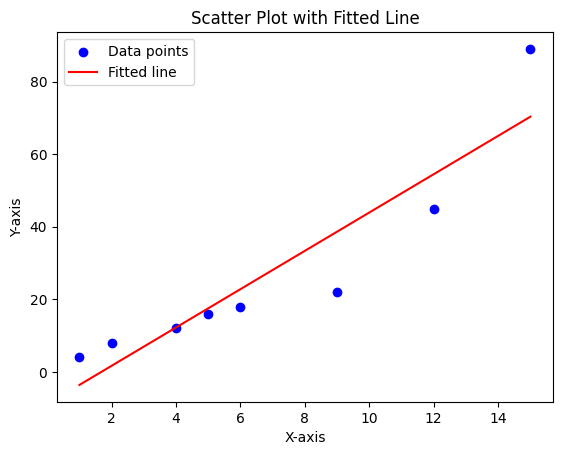

In [4]:
# Comparing it to the iterative approach    
reshaped_x = x.reshape(-1, 1)
    
model = LinearRegression()
model.fit(reshaped_x, y)
phi_0 = model.intercept_
phi_1 = model.coef_[0]

plot_fitted_2d_graph(x, y, phi_0, phi_1)

##### 2) Direct approach

$
\begin{aligned}
\alpha \text{) } \\
&2 \cdot (\sum_{i=1}^I \phi_0+\phi_1 \cdot x_i-y_i)=0 \\
&\Leftrightarrow \sum_{i=1}^I \phi_1 \cdot x_i-y_i=-I \cdot \phi_0 \\
&\Leftrightarrow -\frac{\sum_{i=1}^I \phi_1 \cdot x_i-y_i}{I}=\phi_0 \\
&\Leftrightarrow -\frac{\sum_{i=1}^I x_i}{I} \cdot \phi_1+\frac{\sum_{i=1}^I y_i}{I}=-\bar{x} \cdot \phi_1+\bar{y}=\phi_0 \\
&
\end{aligned}
$


$
\begin{aligned}
&2 \cdot \sum_{i=1}^I\left(\phi_0+\phi_1 \cdot x_i-y_i\right) \cdot x_i=0 \\
& \stackrel{\alpha}{\Leftrightarrow} \sum_{i=1}^{I}\left(-\bar{x} \cdot \phi_1+\bar{y}+\phi_1 \cdot x_i-y_i\right) \cdot x_i=0 \\
& \Leftrightarrow-\phi_1 \sum_{i=1}^{I} x_i \cdot \bar{x}+\sum_{i=1}^I x_i \cdot \bar{y}+\phi_1\left\langle x, x\right\rangle-\langle x, y\rangle=0 \\
& \Leftrightarrow \phi_1 \cdot\left(\langle x, x\rangle-\sum_{i=1}^I x_i \cdot \bar{x}\right)+\bar{y} \cdot \sum_{i=1}^I x_i -\langle x, y\rangle=0 \\
& \Leftrightarrow \phi_1=\frac{\langle x, y\rangle-\bar{y} \cdot \sum_{i=1}^I x_i}{\langle x, x\rangle-\sum_{i=1}^I x_i \cdot \bar{x}} \\
&
\end{aligned}
$

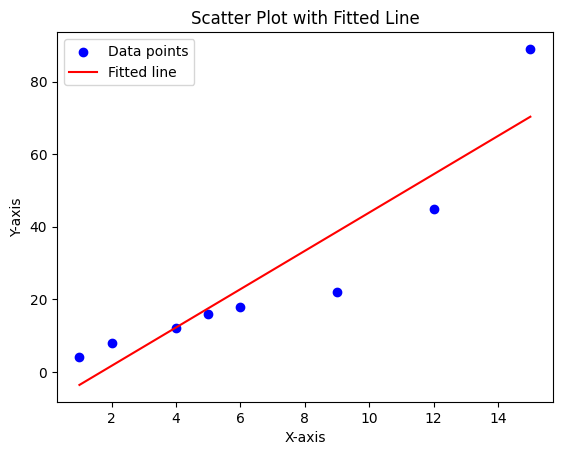

In [5]:
def lr_direct(x: np.array, y: np.array) -> tuple[float, float]:
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    x_sum = np.sum(x)
    phi_1 = (np.dot(x, y) - y_mean * x_sum) / (np.dot(x, x) - x_sum * x_mean)
    phi_0 = - x_mean * phi_1 + y_mean
    return phi_0, phi_1

phi_0, phi_1 = lr_direct(x, y)
plot_fitted_2d_graph(x, y, phi_0, phi_1)

3) Consider reformulating linear regression as a generative model, so we have x =  
g[y,ϕ] = ϕ0 + ϕ1y. What is the new loss function? Find an expression for the inverse function  
y = g−1[x,ϕ] that we would use to perform inference. Will this model make the same  
predictions as the discriminative version for a given training dataset {xi, yi}? One way to establish  
this is to write code that fits a line to three data points using both methods and see if  
the result is the same.

In this case two different things are being minimized:
- vertical distance
- horizontal distance  

The vertical distance will not be the same as the squared distance to this point
horizontally.

With the generative approach you can create in addition to the already existing x,y training pairs additional x,y training pairs

$
\begin{aligned}
y & =\phi_1 x+\phi_0 \\
\Leftrightarrow  x&=\frac{y-\phi_0}{\phi_1}=\frac{1}{\phi_1} \cdot y-\frac{\phi_0}{\phi_1} \\
\omega: & =\frac{1}{\phi_1} \text { and } b:=-\frac{\phi_0}{\phi_1} \\
L[\phi] & =\sum_{i=1}^T\left(\omega \cdot y_i+b-x_i\right)^2 \\
\phi_1 & =\frac{1}{\omega} \\
\phi_0 & =-b \cdot \phi_1
\end{aligned}
$

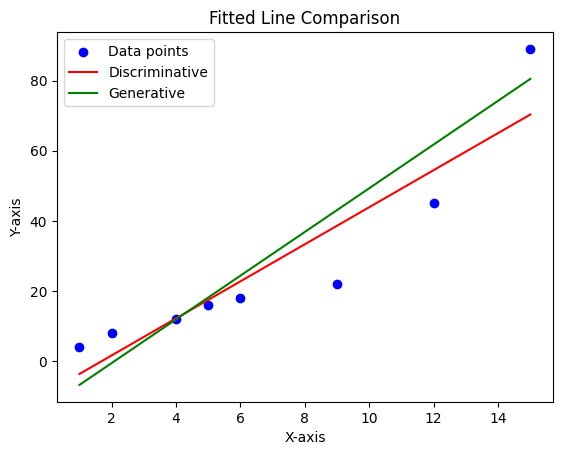

In [6]:
b, w = lr_direct(y, x)

# resubstituition
inv_phi_1 = 1 / w
inv_phi_0 = - b * phi_1

plt.scatter(x, y, color='blue', label='Data points')

x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = phi_0 + phi_1 * x_line
plt.plot(x_line, y_line, color='red', label='Discriminative')

inv_y_line = inv_phi_0 + inv_phi_1 * x_line
plt.plot(x_line, inv_y_line, color='green', label='Generative')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Fitted Line Comparison')
plt.legend()
plt.show()

